<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [3]:
df = pd.read_csv('../../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [6]:
df.head(3).T


,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [7]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,NaN,NaN,NaN,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,NaN,NaN,NaN,445.0


In [13]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/62458/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [4]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 15), "axes.titlesize" : 28 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [5]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [6]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* март 2015,
* апрель 2015,
* апрель 2016.

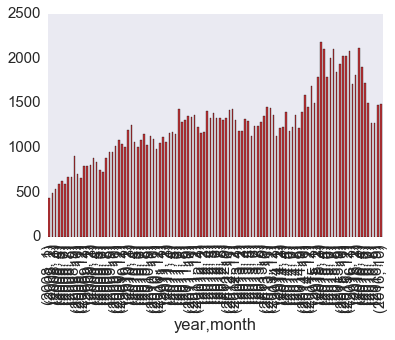

In [26]:
df.groupby(["year", "month"])['post_id'].count().plot(kind='bar')

In [7]:

df['y_m'] = df["year"].astype(str) + '.' + df['month'].astype(str)
df['y_m'].value_counts()

2015.3     2189
2016.3     2115
2015.7     2111
2015.4     2110
2015.12    2084
2015.11    2035
2015.10    2030
2015.6     2004
2015.9     1944
2016.4     1910
2015.8     1849
2016.2     1819
2015.5     1799
2015.2     1793
2016.5     1726
2016.1     1717
2014.12    1694
2014.10    1595
2015.1     1504
2016.6     1498
2016.10    1493
2016.9     1482
2014.11    1462
2013.10    1456
2013.11    1452
2011.6     1439
2012.11    1435
2012.10    1421
2012.3     1416
2014.9     1408
           ... 
2011.2     1072
2010.4     1068
2010.12    1055
2009.12    1049
2010.8     1029
2009.10    1021
2010.5     1012
2010.1     1010
2010.11     990
2009.8      956
2009.9      955
2008.9      914
2009.7      891
2009.3      890
2009.4      840
2009.2      812
2008.12     798
2009.1      797
2009.5      755
2009.6      733
2008.10     712
2008.8      677
2008.7      674
2008.11     661
2008.5      635
2008.6      599
2008.4      597
2008.3      545
2008.2      496
2008.1      435
Name: y_m, dtype: int64

## 2\. Проанализируйте публикации в этом месяце (из вопроса 1)

Выберите один или несколько вариантов:

* На графике не заметны какие-либо выбросы или аномалии,
* Один или несколько дней сильно выделяются из общей картины,
* На хабре _всегда_ больше статей, чем на гиктаймсе,
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`

In [55]:
new_df = df.groupby(["year", "month", "dayofweek"])['post_id'].count()

In [8]:
df['mon_yr'] = [str(p)[:7] for p in df.published]

In [9]:
print(df.mon_yr.value_counts()[:10])
popmon = df.mon_yr.value_counts().index[0]
print(popmon)

2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
2015-11    2035
2015-10    2030
2015-06    2004
2015-09    1944
2016-04    1910
Name: mon_yr, dtype: int64
2015-03


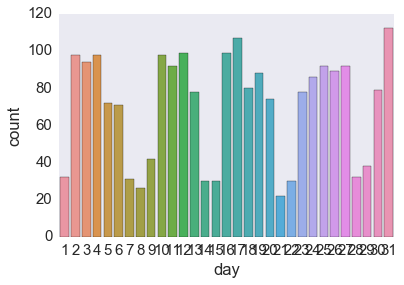

In [10]:
df_popmonth = df[df.mon_yr == popmon]
df_popmonth['day'] = [p.day for p in df_popmonth.published]

sns.countplot(x = 'day', data = df_popmonth);


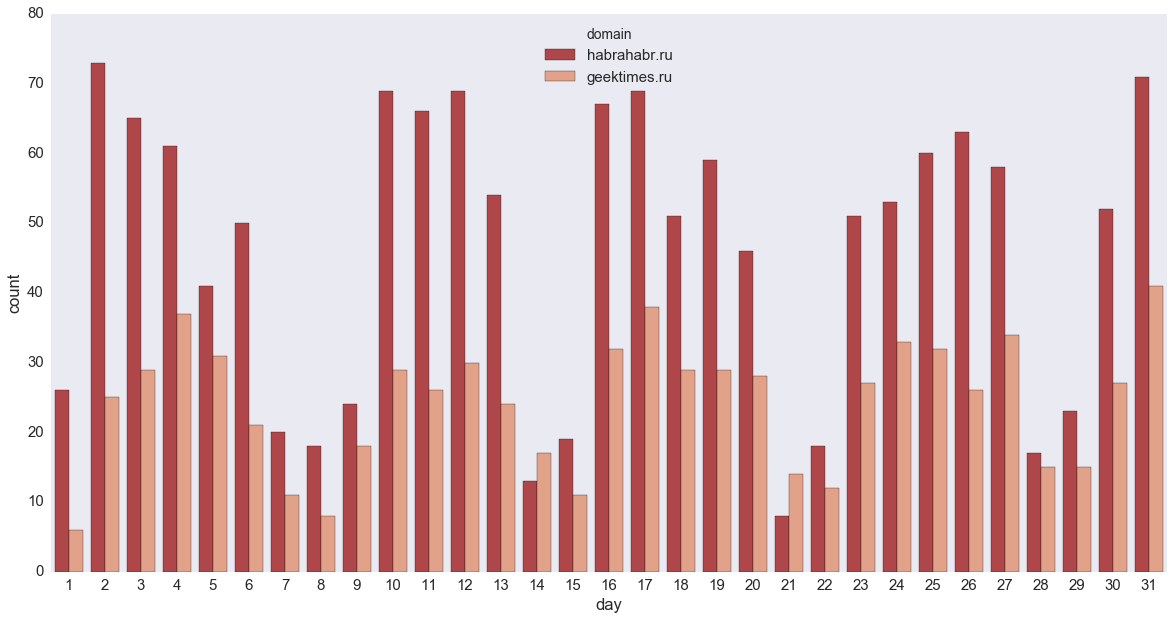

In [11]:
plt.rc("figure", figsize=(20, 10))
sns.countplot(x = 'day', hue = 'domain', data = df_popmonth);

In [109]:
df.columns

Index(['url', 'domain', 'post_id', 'published', 'author', 'flow', 'polling',
       'content_len', 'title', 'comments', 'favs', 'views', 'votes_plus',
       'votes_minus', 'year', 'month', 'dayofweek', 'hour', 'y_m', 'mon_yr'],
      dtype='object')

## 3\. Выберите верное утверждение

* Больше всего просмотров (в среднем) набирают статьи, опубликованные в 12 часов дня;
* У опубликованных в 10 утра постов больше всего комментариев  (в среднем);
* Больше всего просмотров  (в среднем) набирают статьи, опубликованные в 6 часов утра;
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
* На хабре дневные статьи комментируют чаще  (в среднем), чем вечерние.

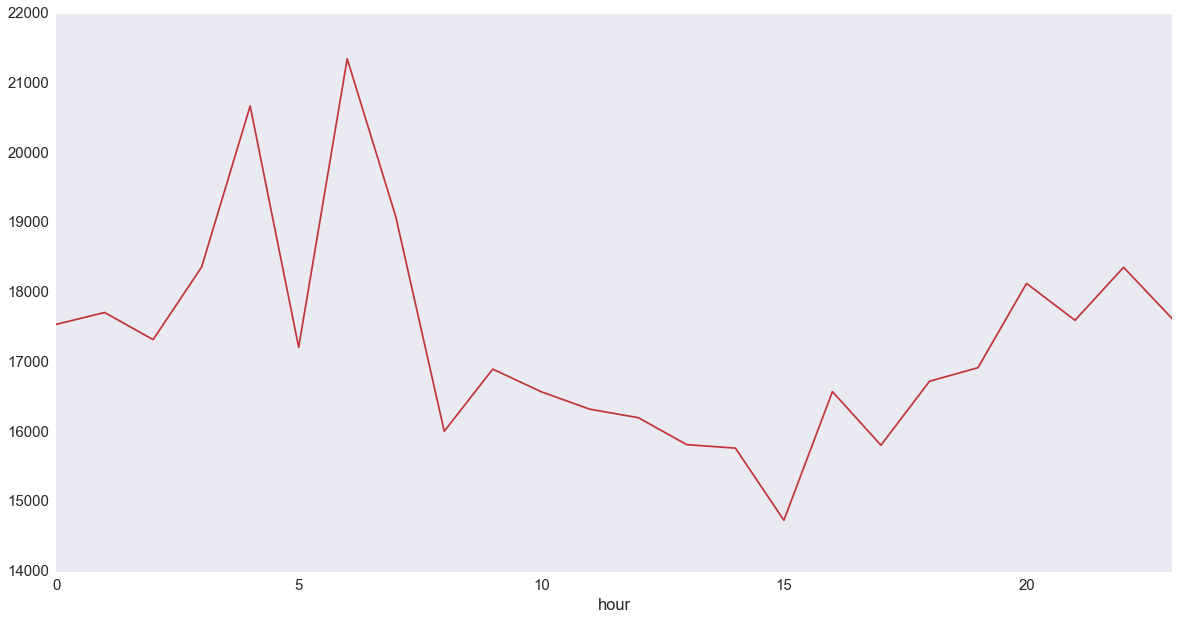

In [15]:
#df.groupby('hour')['post_id'].count().plot()
#df.groupby('hour')['post_id'].count()
#print(df.groupby('hour')['views'].sum())
df.groupby('hour')['views'].mean().plot()

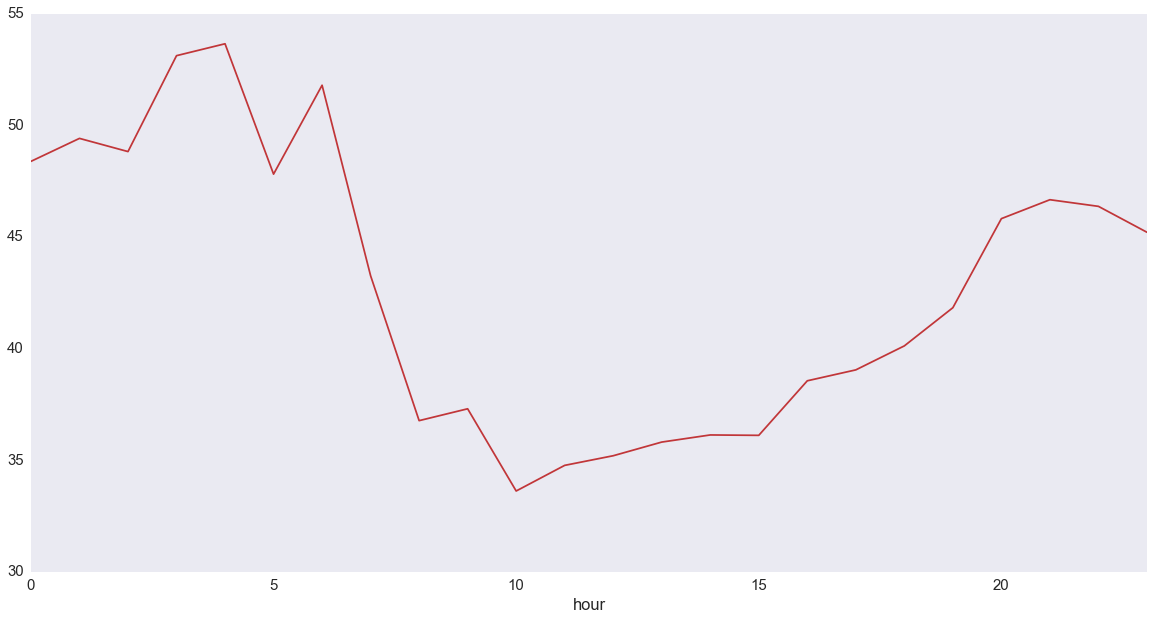

In [16]:
df.groupby('hour')['comments'].mean().plot()

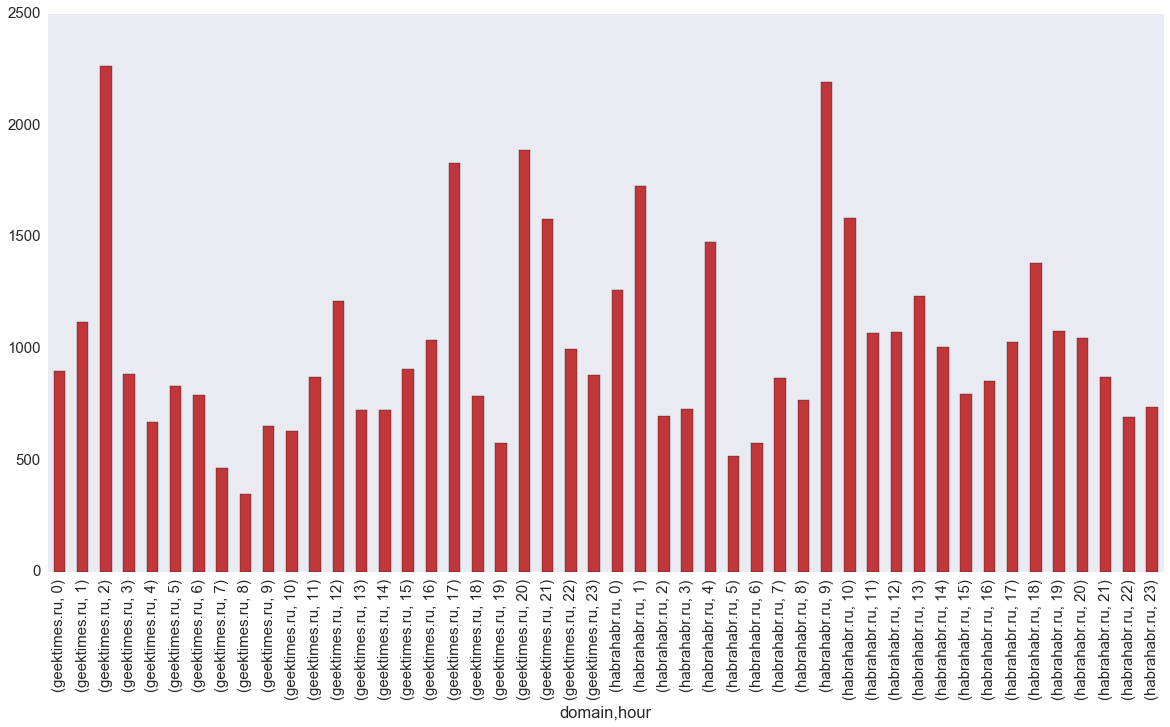

In [19]:
df.groupby(['domain', 'hour'])['comments'].max().plot(kind='bar')

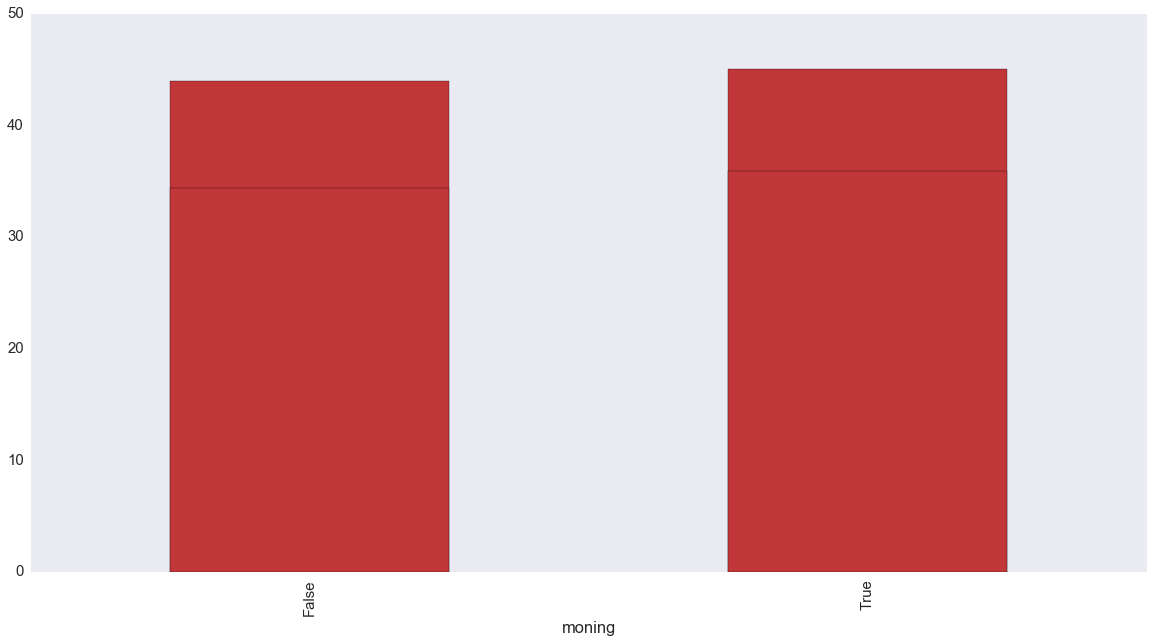

In [25]:
df[df['domain']=='habrahabr.ru'].groupby('hour')['comments'].mean().plot(kind='bar')
df['moning'] = df['hour'] < 12
df[df['domain']=='habrahabr.ru'].groupby('moning')['comments'].mean().plot(kind='bar')

## 4\. Кого из топ-20 авторов (по числу статей) чаще всего минусуют (в среднем)?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [57]:
author1 = df.author.value_counts()[:20]
dir(author1)
author1.keys()

Index(['@alizar', '@marks', '@SLY_G', '@ivansychev', '@semen_grinshtein',
       '@jeston', '@aleksandrit', '@XaocCPS', '@Mithgol', '@Mordatyj',
       '@Shapelez', '@ilya42', '@atomlib', '@ragequit', '@Tylerskald',
       '@andorro', '@jasiejames', '@lozga', '@Sterhel', '@azazelis'],
      dtype='object')

In [67]:
df[df.author.isin(author.keys())].groupby('author')['votes_minus'].mean().sort_values()

author
@azazelis             0.801105
@semen_grinshtein     1.167378
@jasiejames           1.516432
@lozga                2.420000
@ivansychev           2.498519
@marks                3.834997
@ragequit             4.018018
@SLY_G                4.276947
@atomlib              4.407982
@jeston               4.831917
@Shapelez             5.196998
@Tylerskald           5.518519
@ilya42               6.216797
@Mordatyj             7.471455
@alizar               7.928191
@Sterhel              9.350785
@aleksandrit          9.974643
@andorro             13.654676
@XaocCPS             15.286913
@Mithgol             20.481081
Name: votes_minus, dtype: float64

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

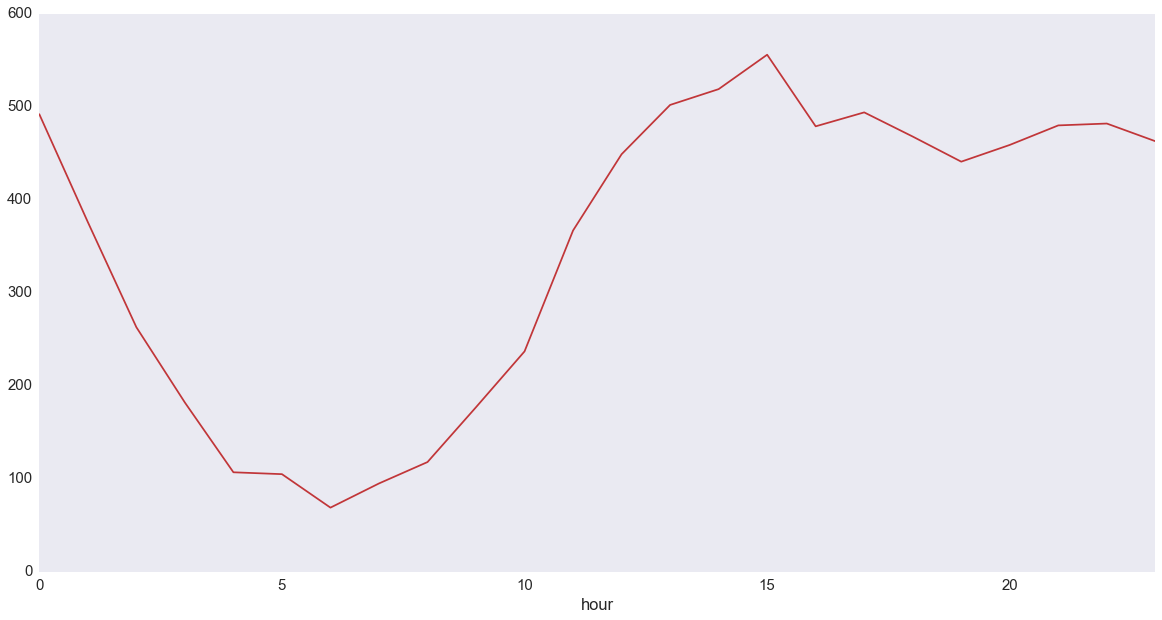

In [75]:
df[df['dayofweek']==6].groupby('hour')['post_id'].count().plot()

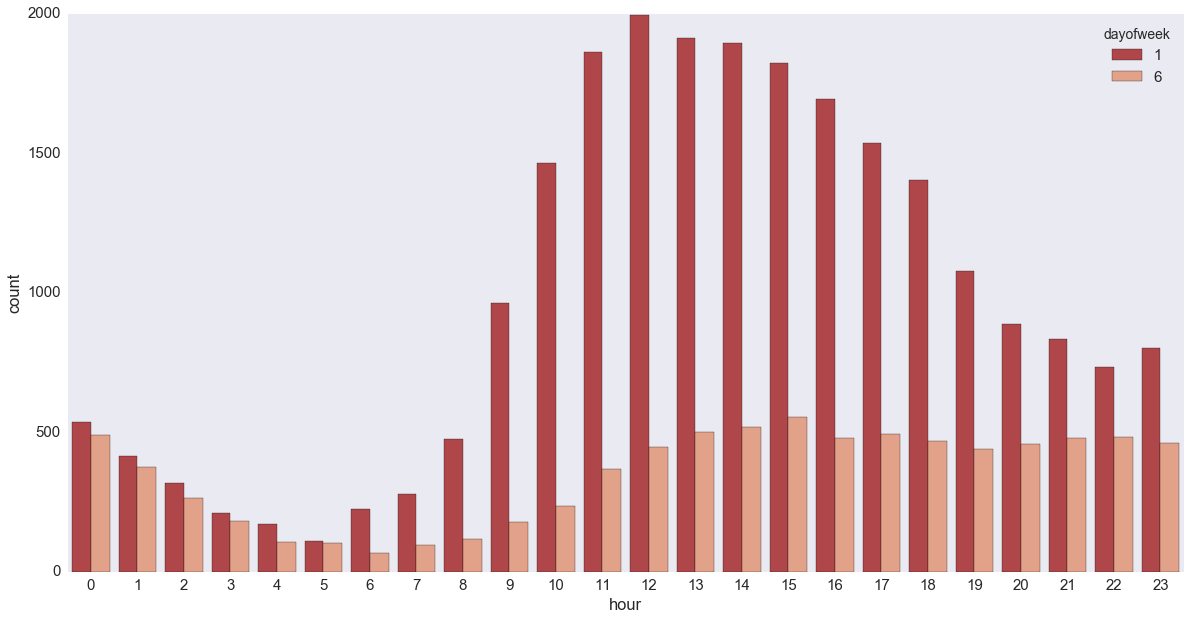

In [76]:
g = sns.countplot(x = 'hour', hue = 'dayofweek', data = df[df.dayofweek.isin([1, 6])]);

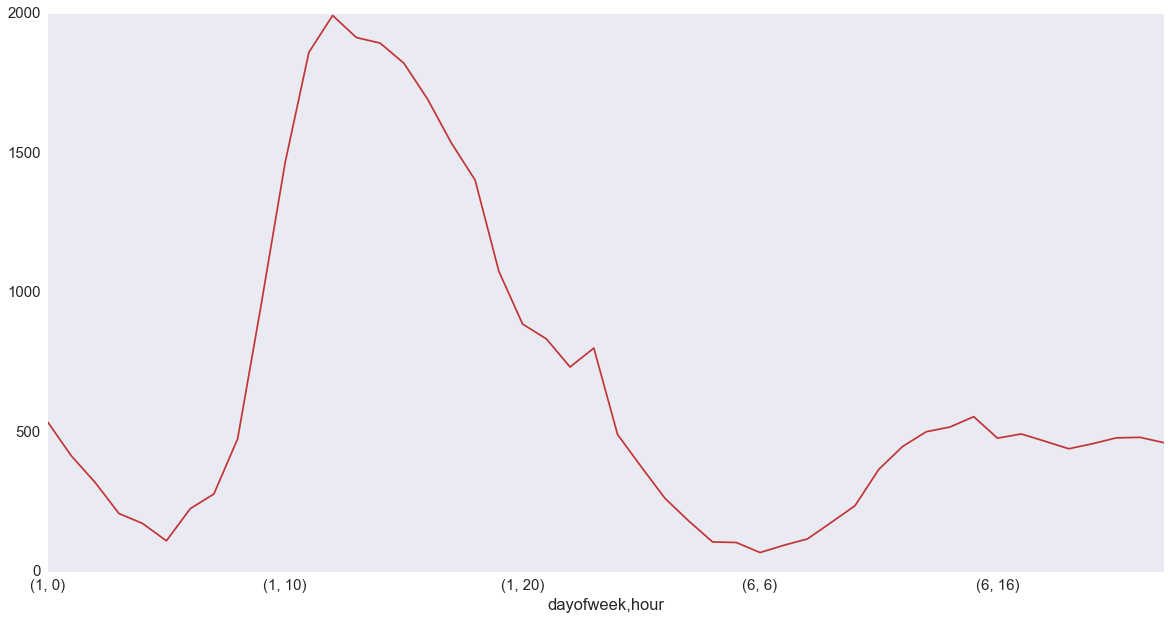

In [78]:
df[df.dayofweek.isin([1, 6])].groupby(['dayofweek','hour'])['post_id'].count().plot()